作业1
基于Sesame，获取所偶有NGC天体的位置，并画图。根据其空间分布做进一步的阐述，是否是各向同性，银道，Virgo团等。

In [4]:
from astropy.coordinates import SkyCoord
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

In [5]:
data = Table.read('VII_1B_catalog.dat.fits')
name = data['NGC']
lon = data['GLON']
lat = data['GLAT']

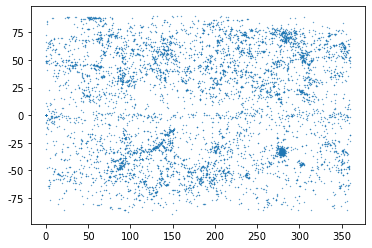

In [6]:
plt.scatter(lon, lat, s=0.1)

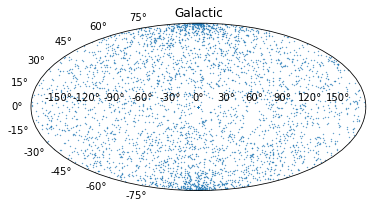

In [7]:
plt.subplot(projection="aitoff")
plt.scatter(lon, lat, s=0.1)
plt.title('Galactic')
plt.show( )

### 可以用循环实现
POS = []
for i in tqdm(np.arange(1, 7841)):
    POS.append(SkyCoord.from_name('NGC ' + str(i)))

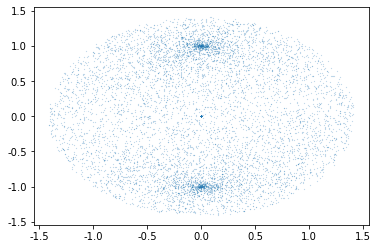

In [8]:
import numpy as np 
z = (1 + np.cos(lat*180/np.pi) * np.cos((lon*180/np.pi)/2))**0.5
x = np.cos(lat*180/np.pi) * np.sin((lon*180/np.pi)/2) / z
y = np.sin(lat*180/np.pi) / z
plt.scatter(x,y,s=0.01)

### 上面这是啥？

homework2
1.LAMOST的视场半径2.5度，某次观测视场中心为(Ra, Dec)=(100,30)，请在天球坐标中准确画出LAMOST的视场观测范围

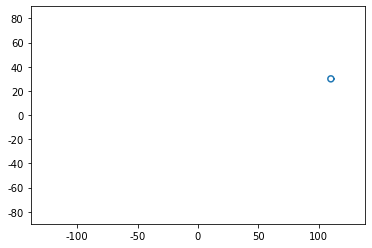

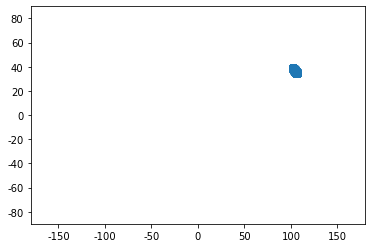

In [42]:
r = 2.5
a, b = (110., 30.)
theta = np.arange(0, 2*np.pi, 0.01)
x = a + r * np.cos(theta)
y = b + r * np.sin(theta)

fig = plt.figure() 
axes = fig.add_subplot(111) 
axes.plot(x, y)
axes.axis('equal')
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show( )


from PyAstronomy import pyasl
x2 = []
y2 = []
for i in range(len(x)):
    x1, y1 = pyasl.aitoff(float(x[i]), float(y[i]))
    x2.append(x1)
    y2.append(y1)
# plt.plot(x1, y1, '-')
# z1 = (1 + np.cos(y*180/np.pi) * np.cos((x*180/np.pi)/2))**0.5
# x1 = np.cos(y*180/np.pi) * np.sin((x*180/np.pi)/2) / z1
# y1 = np.sin(y*180/np.pi) / z1
plt.scatter(x2,y2)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show( )


### Ra,Dec 是球面坐标系，不是直角坐标系
### 参见 http://cluster.shao.ac.cn/~shen/wiki/index.php?title=%E5%A4%A9%E5%9B%BE%E6%8A%95%E5%BD%B1%E4%B8%8A%E7%9A%84%E5%9C%86

homework2

2.银河系的光度大概是1e11Lsun，半光度半径Re大约是5kpc。（太阳的V波段绝对星等是4.8等）。如果银河系距离观测者的距离是100kpc，其视星等和Re的视半径(apparent size)各是多少？Re内的平均表面亮度是多少？如果距离是1Mpc呢？

(1) d = 100kpc
M-Msun = -2.5lg(L/Lsun)
M = -22.7
m - M = 5lgd - 5 
m_100kpc = -2.7 mag
tanθ = Re/d =5kpc/100kpc = 0.05
Re_100 = 2.86 degree 

平均表面亮度：∑ = m + 2.5lg(pi*r_100**2) = 18.6 mag/arcsec^2

(2) d = 1Mpc
m_1Mpc = 2.3
Re_1Mpc = 0.28 degree
平均表面亮度不变，为 18.6 mag/arcsec^2

In [20]:
#  100kpc
import math
msun = 5*np.log10(100000)-5+4.8
M = -2.5*np.log10(1e11)+4.8
m = 5*np.log10(100000)-5-22.7
r100 = 3600*math.atan(0.05)*180/np.pi
r = r100
surface_brightness = m + 2.5*np.log10(np.pi*r**2)
print(msun, M, m, r100, r, surface_brightness)

24.8 -22.7 -2.6999999999999993 10304.658814002292 10304.658814002292 18.608042766314835


In [21]:
#1Mpc
m = 5*np.log10(1e6)-5-22.7
r1Mpc = math.atan(5/1e3)*180/np.pi
r = 3600*r1Mpc
surface_brightness = m + 2.5*np.log10(np.pi*r**2)
print(m, r1Mpc, r, surface_brightness)


2.3000000000000007 0.2864765102770745 1031.3154369974682 18.609832273890348
